<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.521338,74.824954,78.809403,-4.688892,189.466804,193.290556,-3.823752
1,0.0,1.0,83.071893,54.342258,47.327919,-0.351592,194.390479,195.685408,-1.294930
2,0.0,2.0,61.647328,98.295626,52.699081,0.877454,223.519489,221.660903,1.858586
3,0.0,3.0,95.497720,73.383122,64.484715,-6.134226,237.231331,243.769479,-6.538149
4,0.0,4.0,61.550856,43.022374,34.175662,0.149875,148.898767,149.782674,-0.883908
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,84.194408,76.071436,27.579794,2.790671,200.636309,198.175309,2.461000
119996,999.0,116.0,57.599262,52.319335,45.003362,5.044279,169.966239,165.829633,4.136606
119997,999.0,117.0,37.203380,53.376133,93.684096,4.536767,198.800375,195.041560,3.758815
119998,999.0,118.0,56.586919,38.478720,54.917900,0.619843,160.603382,160.902045,-0.298663


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.521338,74.824954,78.809403,-4.688892,189.466804,193.290556,-3.823752
1,0.0,1.0,83.071893,54.342258,47.327919,-0.351592,194.390479,195.685408,-1.294930
2,0.0,2.0,61.647328,98.295626,52.699081,0.877454,223.519489,221.660903,1.858586
3,0.0,3.0,95.497720,73.383122,64.484715,-6.134226,237.231331,243.769479,-6.538149
4,0.0,4.0,61.550856,43.022374,34.175662,0.149875,148.898767,149.782674,-0.883908
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,84.194408,76.071436,27.579794,2.790671,200.636309,198.175309,2.461000
119996,999.0,116.0,57.599262,52.319335,45.003362,5.044279,169.966239,165.829633,4.136606
119997,999.0,117.0,37.203380,53.376133,93.684096,4.536767,198.800375,195.041560,3.758815
119998,999.0,118.0,56.586919,38.478720,54.917900,0.619843,160.603382,160.902045,-0.298663


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    30.521338  74.824954  78.809403  ...  189.466804  193.290556 -3.823752
      1.0    83.071893  54.342258  47.327919  ...  194.390479  195.685408 -1.294930
      2.0    61.647328  98.295626  52.699081  ...  223.519489  221.660903  1.858586
      3.0    95.497720  73.383122  64.484715  ...  237.231331  243.769479 -6.538149
      4.0    61.550856  43.022374  34.175662  ...  148.898767  149.782674 -0.883908
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  84.194408  76.071436  27.579794  ...  200.636309  198.175309  2.461000
      116.0  57.599262  52.319335  45.003362  ...  169.966239  165.829633  4.136606
      117.0  37.203380  53.376133  93.684096  ...  198.800375  195.041560  3.758815
      118.0  56.586919  38.478720  54.917900  ...  160.603382  160.902045 -0.298663
      119.0  89.670679  38.090004  32.892896  ...  179.203459  171.088510  8.114949

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    30.521338  74.824954  78.809403  ...  189.466804  193.290556 -3.823752
      1.0    83.071893  54.342258  47.327919  ...  194.390479  195.685408 -1.294930
      2.0    61.647328  98.295626  52.699081  ...  223.519489  221.660903  1.858586
      3.0    95.497720  73.383122  64.484715  ...  237.231331  243.769479 -6.538149
      4.0    61.550856  43.022374  34.175662  ...  148.898767  149.782674 -0.883908
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  84.194408  76.071436  27.579794  ...  200.636309  198.175309  2.461000
      116.0  57.599262  52.319335  45.003362  ...  169.966239  165.829633  4.136606
      117.0  37.203380  53.376133  93.684096  ...  198.800375  195.041560  3.758815
      118.0  56.586919  38.478720  54.917900  ...  160.603382  160.902045 -0.298663
      119.0  89.670679  38.090004  32.892896  ...  179.203459  171.088510  8.114949

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.521338,74.824954,78.809403,-4.688892,189.466804,193.290556,-3.823752
1,0.0,1.0,83.071893,54.342258,47.327919,-0.351592,194.390479,195.685408,-1.294930
2,0.0,2.0,61.647328,98.295626,52.699081,0.877454,223.519489,221.660903,1.858586
3,0.0,3.0,95.497720,73.383122,64.484715,-6.134226,237.231331,243.769479,-6.538149
4,0.0,4.0,61.550856,43.022374,34.175662,0.149875,148.898767,149.782674,-0.883908
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,84.194408,76.071436,27.579794,2.790671,200.636309,198.175309,2.461000
119996,999.0,116.0,57.599262,52.319335,45.003362,5.044279,169.966239,165.829633,4.136606
119997,999.0,117.0,37.203380,53.376133,93.684096,4.536767,198.800375,195.041560,3.758815
119998,999.0,118.0,56.586919,38.478720,54.917900,0.619843,160.603382,160.902045,-0.298663


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    30.521338  74.824954  78.809403  ...  189.466804  193.290556 -3.823752
      1.0    83.071893  54.342258  47.327919  ...  194.390479  195.685408 -1.294930
      2.0    61.647328  98.295626  52.699081  ...  223.519489  221.660903  1.858586
      3.0    95.497720  73.383122  64.484715  ...  237.231331  243.769479 -6.538149
      4.0    61.550856  43.022374  34.175662  ...  148.898767  149.782674 -0.883908
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  84.194408  76.071436  27.579794  ...  200.636309  198.175309  2.461000
      116.0  57.599262  52.319335  45.003362  ...  169.966239  165.829633  4.136606
      117.0  37.203380  53.376133  93.684096  ...  198.800375  195.041560  3.758815
      118.0  56.586919  38.478720  54.917900  ...  160.603382  160.902045 -0.298663
      119.0  89.670679  38.090004  32.892896  ...  179.203459  171.088510  8.114949

[120000 rows x 7 columns]

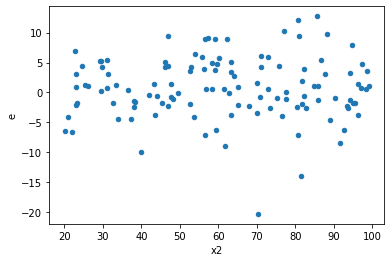

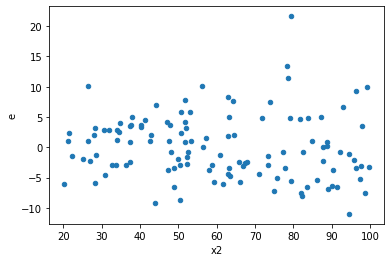

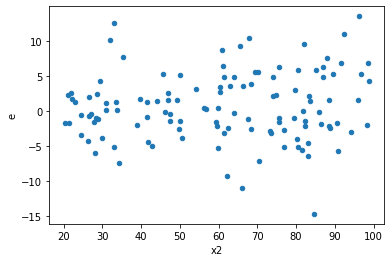

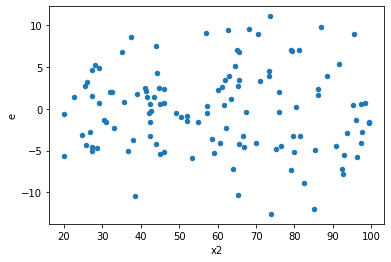

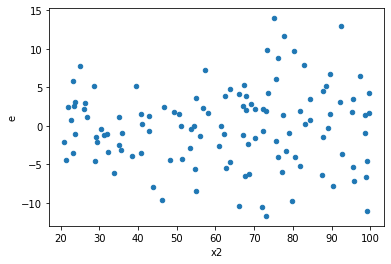

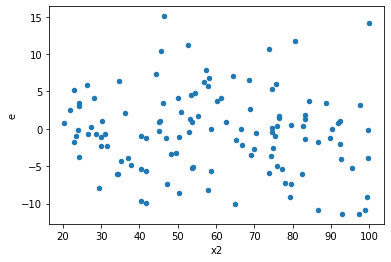

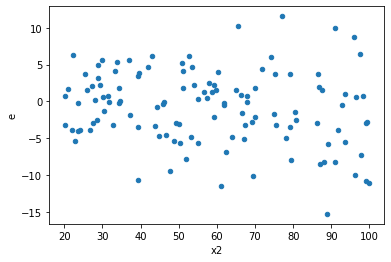

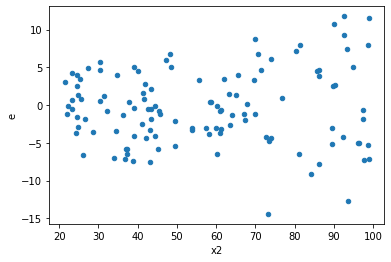

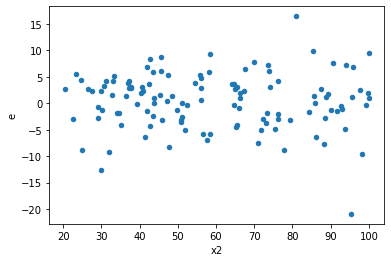

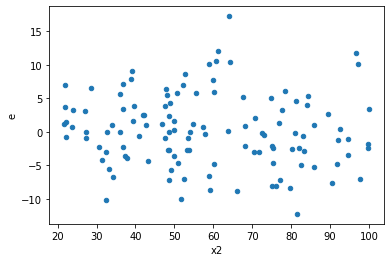

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,1010.2231635835218,735.2640479648468,22.95961735417095,16.71054654465561,1.3739596902361,0.2902919489972706,0.8548540255013647,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,1506.0695775962454,1084.5235291147649,34.22885403627831,24.648262025335566,1.3886923954757946,0.27446904741164957,0.8627654762941752,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,1783.9860309217838,934.0373786334607,40.54513706640418,21.22812224166956,1.9099728466240153,0.032347912393230205,0.9838260438033849,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,2206.0807014849247,747.3989586795452,50.13819776102102,16.986339969989665,2.9516775155567267,0.00041871134117466013,0.9997906443294127,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,2117.0104090965406,907.0239424635952,48.113872934012285,20.614180510536254,2.3340182215548406,0.00532474248125725,0.9973376287593714,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,1523.3730838883362,725.1351687384143,34.62211554291673,16.48034474405487,2.1008125788998644,0.014340617088336671,0.9928296914558317,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,1312.48403794365,879.8764633768976,29.8291826805375,19.997192349474947,1.4916685382246029,0.183689755753371,0.9081551221233145,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,1509.1612118241424,654.5370712759388,34.29911845054869,14.87584252899861,2.3056924932948717,0.006002305890336679,0.9969988470548317,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,1544.8558796657549,566.9346961667602,35.11036090149443,12.88487945833546,2.7249273860129835,0.0010464288518856613,0.9994767855740572,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,1010.2231635835218,735.2640479648468,22.95961735417095,16.71054654465561,1.3739596902361,0.2902919489972706,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,1506.0695775962454,1084.5235291147649,34.22885403627831,24.648262025335566,1.3886923954757946,0.27446904741164957,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,1783.9860309217838,934.0373786334607,40.54513706640418,21.22812224166956,1.9099728466240153,0.032347912393230205,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,2206.0807014849247,747.3989586795452,50.13819776102102,16.986339969989665,2.9516775155567267,0.00041871134117466013,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,2117.0104090965406,907.0239424635952,48.113872934012285,20.614180510536254,2.3340182215548406,0.00532474248125725,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,1523.3730838883362,725.1351687384143,34.62211554291673,16.48034474405487,2.1008125788998644,0.014340617088336671,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,1312.48403794365,879.8764633768976,29.8291826805375,19.997192349474947,1.4916685382246029,0.183689755753371,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,1509.1612118241424,654.5370712759388,34.29911845054869,14.87584252899861,2.3056924932948717,0.006002305890336679,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,1544.8558796657549,566.9346961667602,35.11036090149443,12.88487945833546,2.7249273860129835,0.0010464288518856613,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    610
Reject005=1 : Homoscedasticity      390
Name: Result_test, dtype: int64